In [1]:
%config Completer.use_jedi = False

In [2]:
#pip install transformers

In [1]:
print('hi')

hi


In [2]:
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv('df_for_PCA.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Subject_ID,diagadhd,CHILDgender,age,gmd_17Networks_1,zfALFF_17Networks_1,zDCwei_17Networks_1,zReHo_17Networks_1,gmd_17Networks_10,zfALFF_17Networks_10,...,zDCwei_vCa_R,zReHo_vCa_R,gmd_vmPu_L,zfALFF_vmPu_L,zDCwei_vmPu_L,zReHo_vmPu_L,gmd_vmPu_R,zfALFF_vmPu_R,zDCwei_vmPu_R,zReHo_vmPu_R
0,sub-0015,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,sub-0085,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,sub-0134,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,sub-0152,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,sub-0260,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## definig train and test set with adversarial validation (with covariate)

In [4]:
# train-test split evaluation of xgboost model
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# split data into X and y
#X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,2:], data['diagadhd'], test_size=0.3)
training_set, test_set = train_test_split(df, test_size = 0.2, random_state = 3)
X_train = training_set.iloc[:,2:].values
y_train = training_set.iloc[:,1].values
X_test = test_set.iloc[:,2:].values
y_test = test_set.iloc[:,1].values

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

/home/tara/Programming/env/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:56:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 37.50%


In [5]:
trans = StandardScaler().fit(X_train)
X_train = trans.transform(X_train)
X_test = trans.transform(X_test)

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca_fit = pca.fit(X_train)
X_ptrain = pca_fit.transform(X_train)
X_ptest = pca_fit.transform(X_test)

#principalDf = pd.DataFrame(data = X_ptrain, columns = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8'])

In [7]:
#pca_test = pca.transform(X_test)

In [7]:
principalDf['diagadhd'] = df['diagadhd']
principalDf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,diagadhd
0,-6.316805,-3.993805,2.608242,-1.797895,0.423309,-0.187331,-0.875110,2.575599,0.723420,1.380388,0.860510,0
1,-3.483505,3.740298,3.714566,-1.483971,-0.930990,-1.223241,-0.583681,-2.274591,0.437284,-1.343449,0.760997,0
2,-5.072733,-1.089990,-2.044431,-0.990286,4.428741,3.542264,0.358943,-1.700943,1.900262,2.199640,-3.158007,0
3,9.102421,-0.533293,0.310210,6.574113,1.079817,-0.325707,0.911044,1.607497,0.644376,-2.287986,0.765098,0
4,0.069205,-1.513307,0.906915,0.406813,-0.200406,2.936110,-0.704770,0.866107,1.905369,-0.771493,0.086015,1


### Scree plot, explained_variance_ratio_, and explained_variance_ to find proper number of components

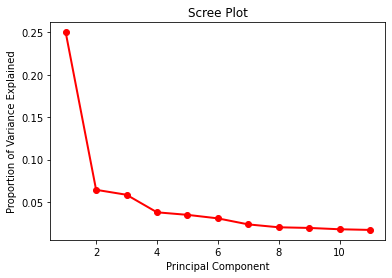

In [8]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [9]:
print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)  
    
out_sum = np.cumsum(pca.explained_variance_ratio_)  
print ("Cumulative Prop. Variance Explained: ", out_sum)

Proportion of Variance Explained :  [0.25011705 0.06444237 0.05860287 0.03793637 0.03493877 0.03079932
 0.02369382 0.02028154 0.01952569 0.01796059 0.0171905 ]
Cumulative Prop. Variance Explained:  [0.25011705 0.31455943 0.3731623  0.41109867 0.44603743 0.47683676
 0.50053058 0.52081212 0.54033781 0.5582984  0.5754889 ]


In [10]:
print(pca.explained_variance_)

[46.92282182 12.08961172 10.9941008   7.11699339  6.55463309  5.77805931
  4.44504252  3.80488702  3.6630867   3.36946888  3.22499718]


In [11]:
features = df.drop(['Subject_ID', 'diagadhd'], axis =1)

In [12]:
features.head()

,CHILDgender,age,gmd_17Networks_1,zfALFF_17Networks_1,zDCwei_17Networks_1,zReHo_17Networks_1,gmd_17Networks_10,zfALFF_17Networks_10,zDCwei_17Networks_10,zReHo_17Networks_10,...,zDCwei_vCa_R,zReHo_vCa_R,gmd_vmPu_L,zfALFF_vmPu_L,zDCwei_vmPu_L,zReHo_vmPu_L,gmd_vmPu_R,zfALFF_vmPu_R,zDCwei_vmPu_R,zReHo_vmPu_R
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
loadings = pd.DataFrame(pca.components_.T, columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10', 'pc11'], index=features.columns)
#loadings = loadings[['pc1','pc2','pc3','pc4','pc5']]
#PC1 = loadings.sort_values("pc1")
loadings.shape
#loadings.sort_values(by=('pc1'))

(1814, 11)

In [15]:
#loadings = loadings.loc[(loadings!=0).any(1)]
#loadings.shape

In [16]:
#loadings.loc['CHILDgender']

In [17]:
#loadings.loc['age']

In [18]:
#loadings.sort_values(by='pc1').head(60)

In [19]:
#plt.scatter(principalDf["pc1"], principalDf["pc2"], c = df["diagadhd"])

### removing features with 0 value in components from features dataframe

In [20]:
#loadings = loadings.reset_index()
#loadings.head()

In [21]:
#df = features.copy()
#df2 = pd.DataFrame()
#for col in features.columns:
    #print(col)
#    for feat in loadings['index'].values:
#        if col == feat:
#            df2 = pd.concat([df2, df[[col]]], axis=1)
#            break

In [22]:
#loadings = loadings.set_index('index')
#loadings.head()

In [14]:
backup_loadings = loadings.copy()

In [15]:
loadings = loadings[abs(loadings["pc1"])>0.1]

In [16]:
loadings.shape

(33, 11)

In [18]:
loadings.sort_values(by = 'pc1').head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
zfALFF_17Networks_RH_ContA_PFCl_4,-0.119598,0.041378,-0.006692,0.003267,-0.030719,0.004065,0.065080,-0.010528,0.079040,0.015017,0.032177
zfALFF_17Networks_RH_SalVentAttnB_PFCl_1,-0.118961,0.000841,0.005337,0.130390,0.013202,-0.004232,-0.033737,0.056462,0.040069,0.030339,0.048398
zfALFF_17Networks_RH_ContA_IPS_4,-0.116965,0.029959,0.051141,-0.065172,-0.018406,-0.019012,0.082123,0.036223,-0.022768,0.054106,0.056551
zfALFF_17Networks_RH_SalVentAttnA_PrC_1,-0.116930,0.014780,-0.023332,-0.033392,-0.056886,-0.003817,0.049436,-0.000603,0.031052,-0.040564,0.001169
zfALFF_17Networks_RH_SalVentAttnB_PFClv_1,-0.116825,0.028476,0.034402,0.055770,0.014484,-0.021674,0.056776,0.028045,0.034755,-0.018696,0.053978


## components evaluation figures

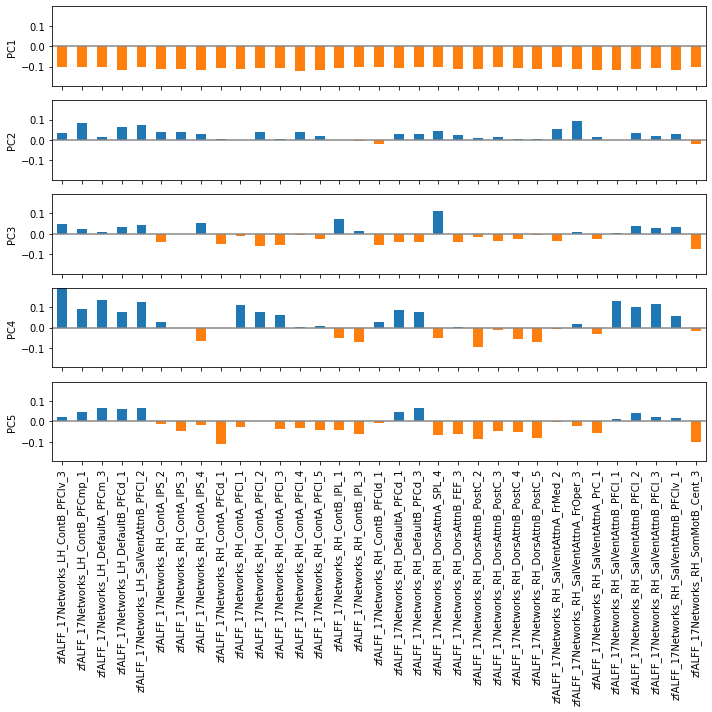

In [27]:
#loadings = pd.DataFrame(pca.components_[0:5, :], 
                    #    columns=features.columns)
#loadings = loadings.loc[(loadings!=0).any(1)]
#loadings = loadings.reset_index()
maxPC = 1.01 * np.max(np.max(np.abs(loadings.iloc[0:5, :])))
f, axes = plt.subplots(5, 1, figsize=(10, 10), sharex=True)
for i, ax in enumerate(axes):
    pc_loadings = loadings.iloc[:, i]
    colors = ['C0' if l > 0 else 'C1' for l in pc_loadings]
    ax.axhline(color='#888888')
    pc_loadings.plot.bar(ax=ax, color=colors)
    ax.set_ylabel(f'PC{i+1}')
    ax.set_ylim(-maxPC, maxPC)
plt.tight_layout()
plt.show()

In [28]:
#correlation of features and components
#import seaborn as sns
#import matplotlib.pyplot as plt

#sns.set(rc = {'figure.figsize':(50,80)})
#ax = sns.heatmap(loadings, annot=True, cmap='Spectral')
#plt.show()
#plt.savefig('test.png')

## LR with nested cross validation using just 7 components

In [7]:
# Load required packages
from sklearn import datasets
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.svm import SVC

In [20]:
pcadf = principalDf[[ 'diagadhd', 'pc1', 'pc2', 'pc3', 'pc4', 'pc5','pc6','pc7']]
pcadf.head()

,diagadhd,pc1,pc2,pc3,pc4,pc5,pc6,pc7
0,0,-6.316805,-3.993805,2.608242,-1.797895,0.423309,-0.187331,-0.875110
1,0,-3.483505,3.740298,3.714566,-1.483971,-0.930990,-1.223241,-0.583681
2,0,-5.072733,-1.089990,-2.044431,-0.990286,4.428741,3.542264,0.358943
3,0,9.102421,-0.533293,0.310210,6.574113,1.079817,-0.325707,0.911044
4,1,0.069205,-1.513307,0.906915,0.406813,-0.200406,2.936110,-0.704770


In [21]:
pcadf.to_csv('pcadf.csv')

In [22]:
# train-test split evaluation of xgboost model
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# split data into X and y
#X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,2:], data['diagadhd'], test_size=0.3)
training_set, test_set = train_test_split(pcadf, test_size = 0.2, random_state = 10)
X_train = training_set.iloc[:,1:].values
y_train = training_set.iloc[:,0].values
X_test = test_set.iloc[:,1:].values
y_test = test_set.iloc[:,0].values

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

/home/tara/Programming/env/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:19:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 58.33%


In [19]:
%%time
std_slc = StandardScaler()
logistic_Reg = linear_model.LogisticRegression(class_weight={0:5, 1:7})

pipe = Pipeline(steps=[('std_slc', std_slc),
                       ('logistic_Reg', logistic_Reg)])

#n_components = list(range(1,X.shape[1]+1,1))
C = np.logspace(-4, 4, 50)
penalty = ['l1', 'l2']
param_grid = dict(logistic_Reg__C=C,
                  logistic_Reg__penalty=penalty)


# Create the Grid Search estimator instance for selecting model using
# 2-fold StratifiedKFold cross validation
#
gs = GridSearchCV(estimator= pipe, param_grid = param_grid,
                 cv = 3, scoring = 'accuracy', n_jobs = 10, refit = True)

# Calculate the generalization error / accuracy
gs.fit(X_train,y_train)

#clf = make_pipeline(StandardScaler(), kernel = 'linear', C=0.1)
scores = cross_val_score(gs, X_ptrain, y_train, scoring='accuracy', cv=10)

# Print the mean scores and standard deviation
#
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

/home/tara/Programming/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/home/tara/Programming/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/tara/Programming/env/lib/python3.8/site-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/tara/Programming/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
   

CV accuracy: 0.579 +/- 0.109
CPU times: user 3.77 s, sys: 232 ms, total: 4 s
Wall time: 9.53 s


/home/tara/Programming/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/home/tara/Programming/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/tara/Programming/env/lib/python3.8/site-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/tara/Programming/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
   

In [45]:
#pred = gs.predict(y_test)

In [40]:
gs.best_params_

{'logistic_Reg__C': 0.18420699693267145, 'logistic_Reg__penalty': 'l2'}

In [47]:
#classifier = SVC(kernel='linear', C=1, random_state = 1)
#classifier.fit(X_train,y_train)

In [48]:
#Y_pred = classifier.predict(X_test)

In [49]:
#classifier.score(X_test,y_test)

In [9]:
#clf = make_pipeline(StandardScaler(), kernel = 'linear', C=0.1)
scores = cross_val_score(gs, X_test, y_test, scoring='accuracy', cv=10)

# Print the mean scores and standard deviation
#
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

/home/tara/Programming/env/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/home/tara/Programming/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/home/tara/Programming/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/tara/Programming/env/lib/python3.8/site-packages/sklearn/pipel

CV accuracy: 0.600 +/- 0.153


/home/tara/Programming/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/home/tara/Programming/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/tara/Programming/env/lib/python3.8/site-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/tara/Programming/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
   

# Evaluation

In [57]:
# Confusion matrix
confusion = confusion_matrix(y_test, gs.predict(X_test))
print(confusion)

[[15  3]
 [ 4  2]]


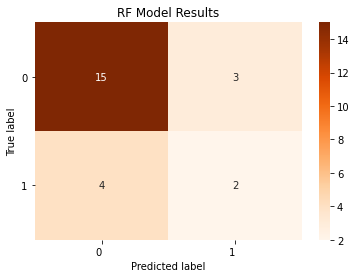

In [58]:
import seaborn as sns

heatmap = sns.heatmap(confusion, annot=True, cmap='Oranges')

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(),
                            rotation=0, ha='right')

heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(),
                            rotation=0, ha='right')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('RF Model Results')
plt.show()

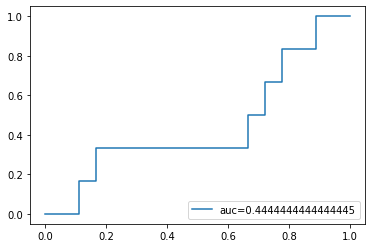

In [59]:
import scikitplot as skplt
import matplotlib.pyplot as plt

y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [60]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model

print('the sensitivity if this model is: ', TP / float(TP+FN))

# Let us calculate specificity

print('the specificity if this model is: ', TN / float(TN+FP))

the sensitivity if this model is:  0.3333333333333333
the specificity if this model is:  0.8333333333333334


In [61]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

y_score1 = model.predict_proba(X_test)[:,1]
y_score2 = model.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)
print('roc_auc_score for SVM: ', roc_auc_score(y_test, y_score1))

roc_auc_score for SVM:  0.4444444444444445
